In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("disham993/9000-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Andres\.cache\kagglehub\datasets\disham993\9000-movies-dataset\versions\2


In [95]:
import pandas as pd

movies = pd.read_csv(f"{path}/mymoviedb.csv", lineterminator='\n')

In [96]:
movies

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

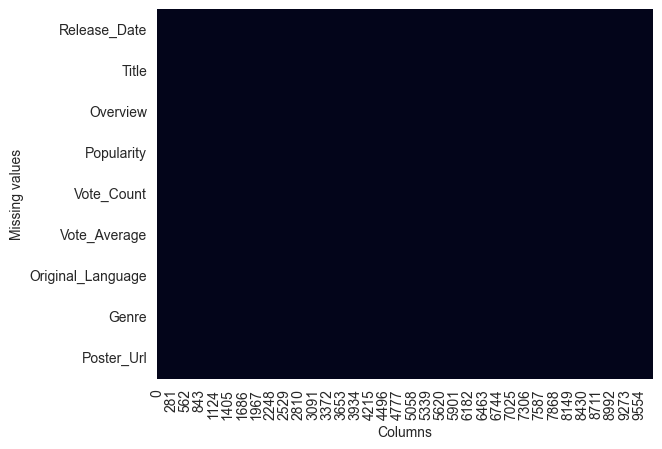

In [98]:
ax = plt.axes()
sns.heatmap(movies.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [99]:
movies["first_genre"] = movies["Genre"].str.split(",").str[0]

In [100]:
movies["first_genre"].value_counts().reset_index()

,first_genre,count
0,Drama,1791
1,Action,1570
2,Comedy,1484
3,Horror,868
4,Animation,805
5,Adventure,586
6,Thriller,515
7,Crime,391
8,Family,350
9,Romance,304


In [101]:
genres = []
for genre in movies["Genre"].str.split(","):
    genres.extend([g.strip() for g in genre])

In [102]:
genres = pd.Series(genres)
genres.value_counts().reset_index()

,index,count
0,Drama,3744
1,Comedy,3031
2,Action,2686
3,Thriller,2488
4,Adventure,1853
5,Romance,1476
6,Horror,1470
7,Animation,1439
8,Family,1414
9,Fantasy,1308


In [103]:
movies["words_in_overview"] = movies["Overview"].str.split().str.len()

In [104]:
movies.loc[movies["words_in_overview"].between(1,4), "Overview"]

6423    Plot unknown.
Name: Overview, dtype: object

In [105]:
movies.loc[movies["words_in_overview"].between(5,14), "Overview"]

87      Terror strikes when a heartbroken woman uses b...
112     Jennifer Dulos, the wealthy, Connecticut mothe...
210               The tenth installment in the Fast Saga.
237     Drac tries out some new monster pets to help o...
351     Katniss Everdeen reluctantly becomes the symbo...
                              ...                        
9596    A U.S. Army colonel alerts the president of a ...
9620    A British Special Boat Service commando tracks...
9689    XOXO follows six strangers whose lives collide...
9737    A college prank at an abandoned house accident...
9760    A documentary behind the making of the movie S...
Name: Overview, Length: 187, dtype: object

In [106]:
movies.loc[movies["words_in_overview"].between(15,24), "Overview"]

8       A revenge mission becomes a fight to save the ...
23      Plagued by strange memories, Neo's life takes ...
26      An ex-NYPD officer-turned-sheriff of a small r...
31      Shang-Chi must confront the past he thought he...
34      Two youngsters from rival New York City gangs ...
                              ...                        
9784    Fin and his wife April travel around the world...
9787    An aging thief hopes to retire and live off hi...
9790    A team searching for a long-lost ship in the A...
9808    The story of a leading political man, suddenly...
9814    After spending years in California, Amir retur...
Name: Overview, Length: 1468, dtype: object

In [107]:
movies.loc[movies["words_in_overview"].between(25,34), "Overview"]

1       In his second year of fighting crime, Batman u...
4       As a collection of history's worst tyrants and...
12      After going to extremes to cover up an acciden...
13      An ambitious carnival man with a talent for ma...
14      The fearless one-eyed weasel Buck teams up wit...
                              ...                        
9800    Plagued by a series of apocalyptic visions, a ...
9803    A soldier returns home to his small town and e...
9811    Against the backdrop of a military dictatorshi...
9822    A dramatization of the Starkweather-Fugate kil...
9826    Documentary style account of a nuclear holocau...
Name: Overview, Length: 1906, dtype: object

In [108]:
movies_25_words = movies.loc[movies["words_in_overview"] >= 25]

In [109]:
movies_25_words

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,first_genre,words_in_overview
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,Action,45
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,Crime,28
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,Thriller,46
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,Animation,89
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,Action,28
...,...,...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,Drama,30
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,Horror,36
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,Mystery,58
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,Music,40


In [110]:
movies_25_words["id"] = [f"{i}" for i in range(len(movies_25_words))]
movies_25_words["tagged_overview"] = movies_25_words[["id", "Overview"]].astype(str).agg(' '.join, axis=1)

C:\Users\Andres\AppData\Local\Temp\ipykernel_2768\2556074897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_25_words["id"] = [f"{i}" for i in range(len(movies_25_words))]
C:\Users\Andres\AppData\Local\Temp\ipykernel_2768\2556074897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_25_words["tagged_overview"] = movies_25_words[["id", "Overview"]].astype(str).agg(' '.join, axis=1)


In [111]:
movies_25_words

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,first_genre,words_in_overview,id,tagged_overview
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,Action,45,0,0 Peter Parker is unmasked and no longer able ...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,Crime,28,1,"1 In his second year of fighting crime, Batman..."
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,Thriller,46,2,2 Stranded at a rest stop in the mountains dur...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,Animation,89,3,"3 The tale of an extraordinary family, the Mad..."
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,Action,28,4,4 As a collection of history's worst tyrants a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...,Drama,30,8166,8166 A dramatization of the Starkweather-Fugat...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...,Horror,36,8167,8167 A female vampire falls in love with a man...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...,Mystery,58,8168,8168 When young and successful reporter Jamie ...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,Music,40,8169,8169 Billie Holiday spent much of her career b...


In [112]:
(
    movies_25_words
    .drop(columns=["words_in_overview"])
    .to_csv(f"movies_cleaned.csv", index=False)
)